This script conducts validation tests on the Republican models, while keeping the 2016 data. 

In [11]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics

In [12]:
#Download data
#Read in data and filter out test data
turnout_train_rep = pd.read_csv("turnout_train_rep_with_2016.csv")




#filter out 2018 data
turnout_train_rep_use = turnout_train_rep[turnout_train_rep['Year'] != 2018]





R^2:  0.9914413886640444
Mean Absolute Error (MAE): 0.654623858267716
Mean Squared Error (MSE): 1.0542239307952732


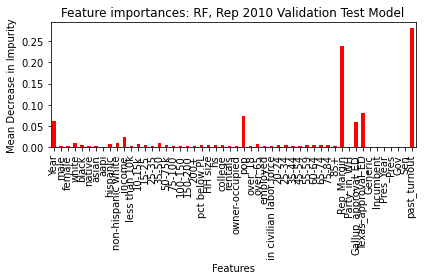

In [23]:
#Validation Test: 2010
np.random.seed(5)

turnout_train_rep_mod = turnout_train_rep_use

#create df for average of past turnout, except for 2018 and 2010.
history_rep = pd.read_csv('history_rep.csv')

history_rep = history_rep[(history_rep['Year'] != 2018) & (history_rep['Year'] != 2010)]
turnout_train_rep_record = history_rep[['Turnout', 'County']]
historical_rep = turnout_train_rep_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_rep_mod = turnout_train_rep_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2010 from testing data
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Year'] != 2010]

#extract feats and outcomes
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']


#Create model
rf = RandomForestRegressor()
rf.fit(model_feats, model_outcome);
pred = rf.predict(model_feats)

#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'red')
plt.title("Feature importances: RF, Rep 2010 Validation Test Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()

In [22]:
#Test 2010

np.random.seed(5)

#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2010_Rep_Gov']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.621035145095098
Mean Absolute Error (MAE): 3.6463311023622045
Mean Squared Error (MSE): 30.85362336814961


R^2:  0.9865796938452022
Mean Absolute Error (MAE): 0.8442769685039362
Mean Squared Error (MSE): 1.748772451122045


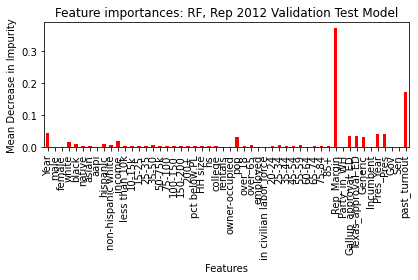

In [24]:
#Validation Test: 2012
np.random.seed(5)

turnout_train_rep_mod = turnout_train_rep_use

#create df for average of past turnout, except for 2018 and 2012.
history_rep = pd.read_csv('history_rep.csv')

history_rep = history_rep[(history_rep['Year'] != 2018) & (history_rep['Year'] != 2012)]
turnout_train_rep_record = history_rep[['Turnout', 'County']]
historical_rep = turnout_train_rep_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_rep_mod = turnout_train_rep_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2012 from testing data
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Year'] != 2012]

#extract feats and outcomes
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']


#Create model
rf = RandomForestRegressor()
rf.fit(model_feats, model_outcome);
pred = rf.predict(model_feats)

#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'red')
plt.title("Feature importances: RF, Rep 2012 Validation Test Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()

In [25]:
#Test 2012

np.random.seed(5)



#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2012_Rep_Sen']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.32478379736756147
Mean Absolute Error (MAE): 5.977467322834644
Mean Squared Error (MSE): 54.541382278543296


In [26]:
#Test 2012

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2012_Rep_Pres']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.1641891629197122
Mean Absolute Error (MAE): 7.354220472440945
Mean Squared Error (MSE): 78.07984281307087


[2012 2010 2016]
R^2:  0.9844056499274607
Mean Absolute Error (MAE): 0.8729105314960626
Mean Squared Error (MSE): 2.051481402411415


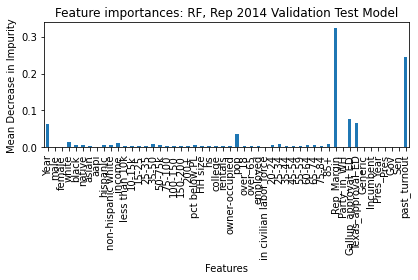

In [30]:
#Validation Test: 2014
np.random.seed(5)

turnout_train_rep_mod = turnout_train_rep_use

#create df for average of past turnout, except for 2018 and 2014.
history_rep = pd.read_csv('history_rep.csv')

history_rep = history_rep[(history_rep['Year'] != 2018) & (history_rep['Year'] != 2014)]
turnout_train_rep_record = history_rep[['Turnout', 'County']]
historical_rep = turnout_train_rep_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_rep_mod = turnout_train_rep_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2014 from testing data
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Year'] != 2014]

#extract feats and outcomes
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)
model_outcome = turnout_train_rep_mod['Turnout']


#Create model
rf = RandomForestRegressor()
rf.fit(model_feats, model_outcome);
pred = rf.predict(model_feats)

#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = rf.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: RF, Rep 2014 Validation Test Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()

In [28]:
#Test 2014

np.random.seed(5)
#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2014_Rep_Gov']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.6654565615760719
Mean Absolute Error (MAE): 3.8477708661417322
Mean Squared Error (MSE): 29.54842518811023


In [29]:
#Test 2014

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2014_Rep_Sen']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = rf.predict(model_feats)


#Print Score

print("R^2: ",rf.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.6796258464696796
Mean Absolute Error (MAE): 3.640318897637795
Mean Squared Error (MSE): 25.547318612204723
